In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

In [2]:
PATH = r'../data/four-shapes/shapes/'
IMG_SIZE = 64
shapes = ['circle', "square", "triangle", "star"]
labels = []
dataset = []

## Reading in data

In [3]:
for shape in shapes:
    print('Getting data for: ', shape)
    #iterating through the folder
    for path in os.listdir(PATH + shape):
        image = cv2.imread(PATH + shape + '/' + path)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image = image.reshape(12288) #64*64*3 = 12288
        dataset.append(image)
        labels.append(shapes.index(shape))

Getting data for:  circle
Getting data for:  square
Getting data for:  triangle
Getting data for:  star


## Showing samples of data

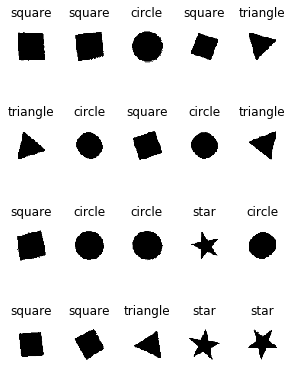

In [4]:
%matplotlib inline
index = np.random.randint(0, len(dataset) - 1, size= 20)
plt.figure(figsize=(5,7))
 
for i, ind in enumerate(index, 1):
    img = dataset[ind].reshape((64, 64, 3))
    lab = shapes[labels[ind]]
    plt.subplot(4, 5, i)
    plt.title(lab)
    plt.axis('off')
    plt.imshow(img)

In [5]:
X = np.array(dataset)
X.shape

(14970, 12288)

In [6]:
y=np.array(labels)
y.shape

(14970,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
perceptron = Perceptron(max_iter=100, shuffle=True)

In [9]:
perceptron.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
perceptron.score(X_test, y_test)

0.9975955116216938

In [11]:
y_pred = perceptron.predict(X_test)
bad_results = [(a,b,c) for (a,b,c) in zip(X_test[y_test != y_pred], 
                                          y_test[y_test != y_pred],
                                          y_pred[y_test != y_pred] )]
len(bad_results)

9

## Showing images with bad results

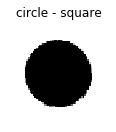

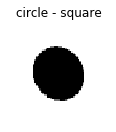

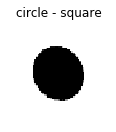

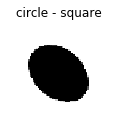

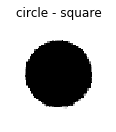

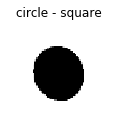

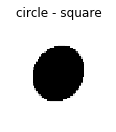

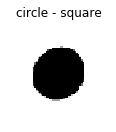

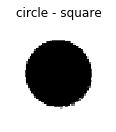

In [12]:
i=1
for x_test, y_test, y_pred in bad_results:
    img = x_test.reshape((64, 64, 3))
    label_test = shapes[y_test]
    label_pred = shapes[y_pred]
    plt.figure(figsize=(20,20))
    plt.subplot(len(bad_results), 1, i)
    plt.title(label_test +' - '+ label_pred)
    plt.axis('off')
    plt.imshow(img)
    i+=1